In [1]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

CATEGORIES = ['building', 'car', 'cat',
              'clothes', 'dog', 'drugs',
              'human', 'plants', 'porno',
              'sea', 'text_msg', 'weapons'
              ]

# Load the DataSet which is ndarray
X_temp = open('x_data_np', 'rb')
x_data_np = pickle.load(X_temp)

# Load the Notes which is ndarray
Y_temp = open('y_data_np', 'rb')
y_data_np = pickle.load(Y_temp)

# Separation of data into Training(70%) and Test(30%)
X_train, X_test, y_train, y_test = train_test_split(x_data_np, y_data_np,
                                                    test_size=0.3, random_state=101)

In [3]:
print(X_train.shape)
print(X_test.shape)

(4224, 77, 77, 3)
(1811, 77, 77, 3)


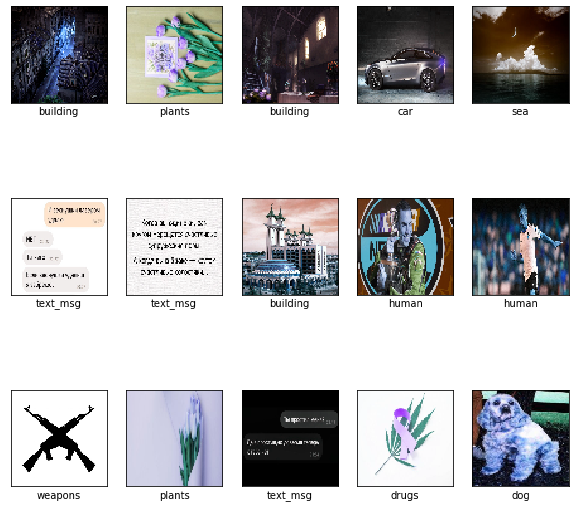

In [4]:
start_image_i = 150
stop_image_i = start_image_i + 15

plt.figure(figsize=(10, 10))

for i in range(start_image_i, stop_image_i):
    plt.subplot(3, 5, i - (start_image_i-1))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(CATEGORIES[y_train[i]])

plt.show()

In [5]:
model = tf.keras.models.load_model('77x77cnn.model')

In [6]:
predictions = model.predict(X_test)
predictions.shape

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(1811, 12)

In [7]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f' {CATEGORIES[predicted_label]} - {100 * np.max(predictions_array)} - {CATEGORIES[true_label]}' , color=color)

In [8]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(12), predictions_array, color='#777777')
    
    plt.ylim([0, 1])
    predictions_label = np.argmax(predictions_array)

    thisplot[predictions_label].set_color('red')
    thisplot[true_label].set_color('blue')

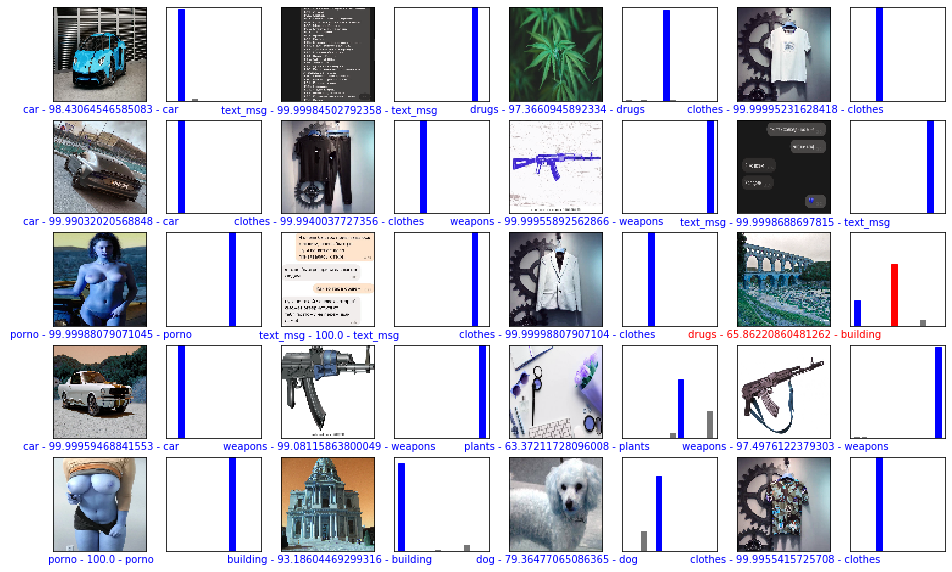

In [9]:
i = 0
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

start_image_i = 1139
stop_image_i = start_image_i + 15

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)


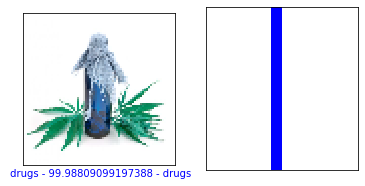

In [10]:
i = 1166

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)

Probability array:
[[2.1496089e-05 1.5048334e-07 4.0918039e-06 6.4873916e-08 4.2547299e-08
  9.9988091e-01 9.2844817e-07 4.5407251e-05 1.3723653e-10 5.3877493e-06
  8.1997676e-08 4.1488809e-05]]
5
8


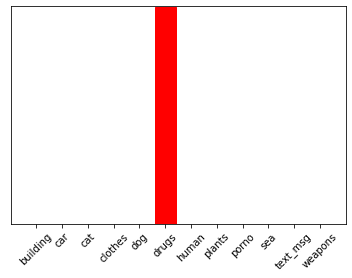

In [11]:
img = X_test[i]
img = (np.expand_dims(img, 0))

predictions_single = model.predict(img)
print(f'Probability array:\n{predictions_single}')

plot_value_array(0, predictions_single, y_test)
_ = plt.xticks(range(len(CATEGORIES)), CATEGORIES, rotation=45)

print(np.argmax(predictions[i]))
print(np.argmin(predictions[i]))

No handles with labels found to put in legend.


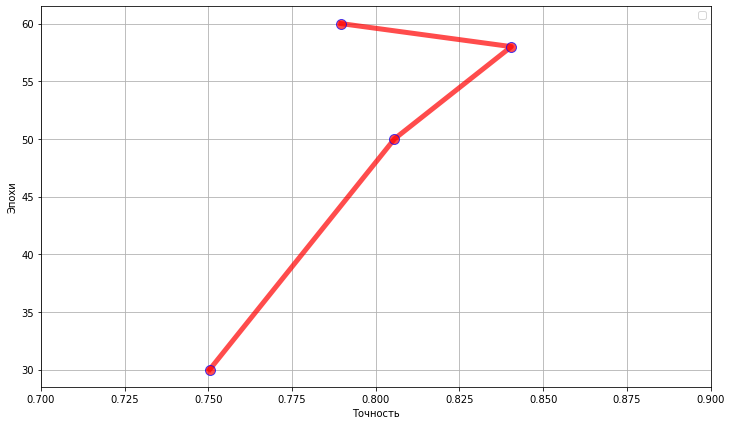

In [92]:
x = [0.7504, 0.8056, 0.8405, 0.7896, ]
y = [30, 50, 58, 60]

plt.figure(figsize=(12, 7))
plt.plot(x, y, 'o-r', alpha=0.7,  lw=5, mec='b', ms=10)
plt.xlabel('Точность')
plt.ylabel('Эпохи')
plt.legend()
plt.xlim(0.7, 0.9)
plt.grid(True)


No handles with labels found to put in legend.


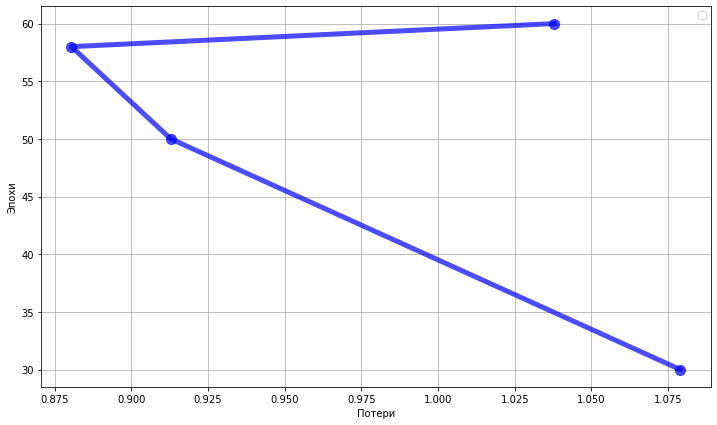

In [95]:
x = [1.0789, 0.9128, 0.8804, 1.0379]
y = [30, 50, 58, 60]

plt.figure(figsize=(12, 7))
plt.plot(x, y, 'o-b', alpha=0.7,  lw=5, mec='b', ms=10)
plt.xlabel('Потери')
plt.ylabel('Эпохи')
plt.legend()
plt.grid(True)

No handles with labels found to put in legend.


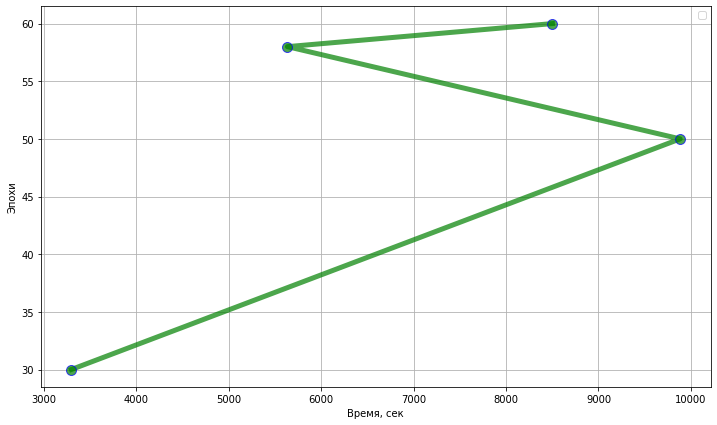

In [97]:
x = [3299.3, 9883.08, 5635.6, 8501.9]
y = [30, 50, 58, 60]

plt.figure(figsize=(12, 7))
plt.plot(x, y, 'o-g', alpha=0.7,  lw=5, mec='b', ms=10)
plt.xlabel('Время, сек')
plt.ylabel('Эпохи')
plt.legend()
plt.grid(True)